In [ ]:
import pandas as pd

df = pd.read_csv(r"data.csv")

print(df.head(60))


          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0     842302         M       17.990         10.38          122.80     1001.0   
1     842517         M       20.570         17.77          132.90     1326.0   
2   84300903         M       19.690         21.25          130.00     1203.0   
3   84348301         M       11.420         20.38           77.58      386.1   
4   84358402         M       20.290         14.34          135.10     1297.0   
5     843786         M       12.450         15.70           82.57      477.1   
6     844359         M       18.250         19.98          119.60     1040.0   
7   84458202         M       13.710         20.83           90.20      577.9   
8     844981         M       13.000         21.82           87.50      519.8   
9   84501001         M       12.460         24.04           83.97      475.9   
10    845636         M       16.020         23.24          102.70      797.8   
11  84610002         M       15.780     

In [2]:
print("shape:", df.shape)

print("col:", df.columns)

print(df.describe())

print("isnull:\n", df.isnull().sum())


shape: (569, 33)
col: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129 

In [3]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

for col in numeric_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"Column: {col} → Outliers found: {len(outliers)}")


Column: id → Outliers found: 81
Column: radius_mean → Outliers found: 14
Column: texture_mean → Outliers found: 7
Column: perimeter_mean → Outliers found: 13
Column: area_mean → Outliers found: 25
Column: smoothness_mean → Outliers found: 6
Column: compactness_mean → Outliers found: 16
Column: concavity_mean → Outliers found: 18
Column: concave points_mean → Outliers found: 10
Column: symmetry_mean → Outliers found: 15
Column: fractal_dimension_mean → Outliers found: 15
Column: radius_se → Outliers found: 38
Column: texture_se → Outliers found: 20
Column: perimeter_se → Outliers found: 38
Column: area_se → Outliers found: 65
Column: smoothness_se → Outliers found: 30
Column: compactness_se → Outliers found: 28
Column: concavity_se → Outliers found: 22
Column: concave points_se → Outliers found: 19
Column: symmetry_se → Outliers found: 27
Column: fractal_dimension_se → Outliers found: 28
Column: radius_worst → Outliers found: 17
Column: texture_worst → Outliers found: 5
Column: perimete

In [4]:

columns_to_drop = ['Unnamed: 32', 'id'] if 'Unnamed: 32' in df.columns and 'id' in df.columns else []
df = df.drop(columns=columns_to_drop)


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\USER\AppData\Local\Temp\ipykernel_27272\1257566942.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='Set2')


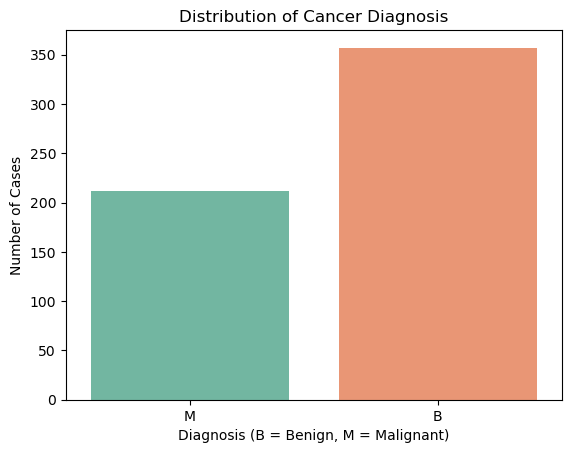

In [ ]:
sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.title('Distribution of Cancer Diagnosis')
plt.xlabel('Diagnosis (B = Benign, M = Malignant)')
plt.ylabel('Number of Cases')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_27272\2077297146.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set3')


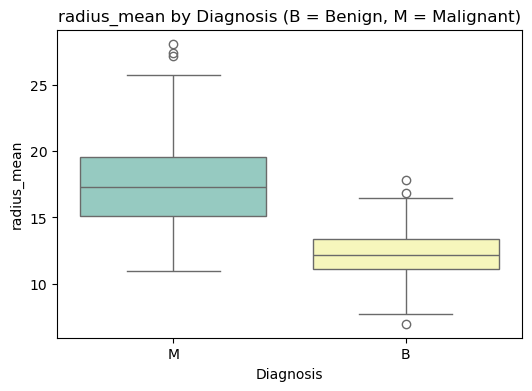

C:\Users\USER\AppData\Local\Temp\ipykernel_27272\2077297146.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set3')


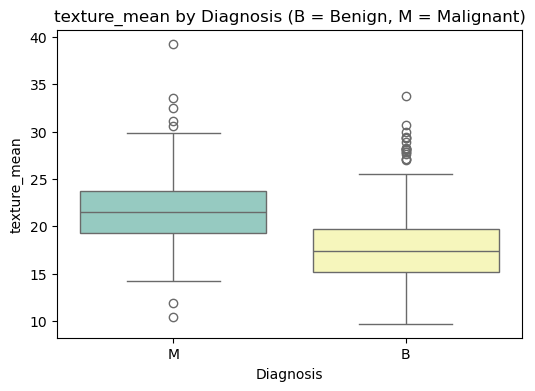

C:\Users\USER\AppData\Local\Temp\ipykernel_27272\2077297146.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set3')


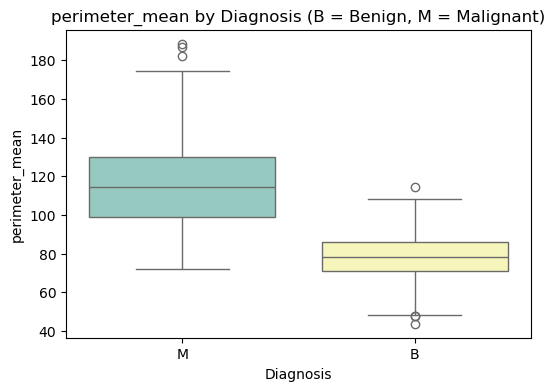

In [7]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set3')
    plt.title(f'{feature} by Diagnosis (B = Benign, M = Malignant)')
    plt.xlabel('Diagnosis')
    plt.ylabel(feature)
    plt.show()


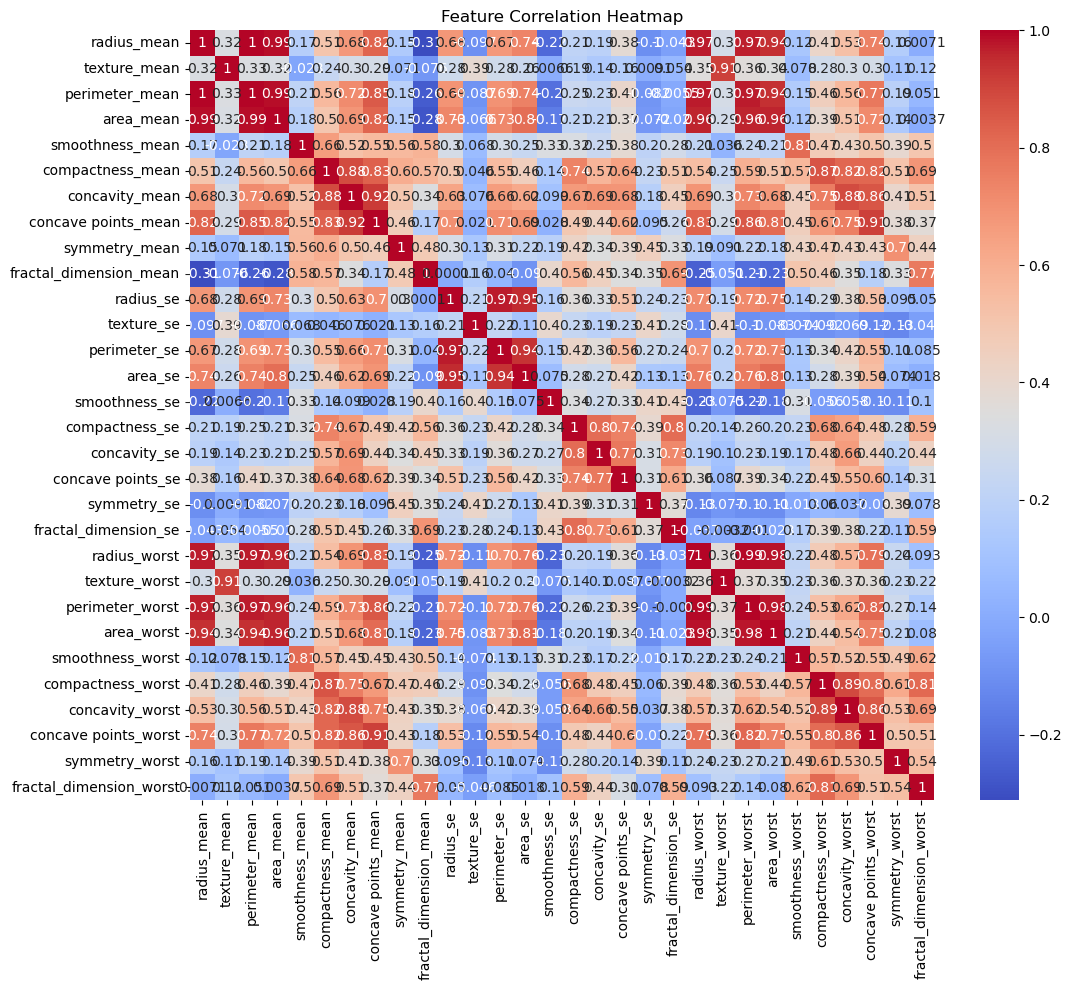

In [8]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()


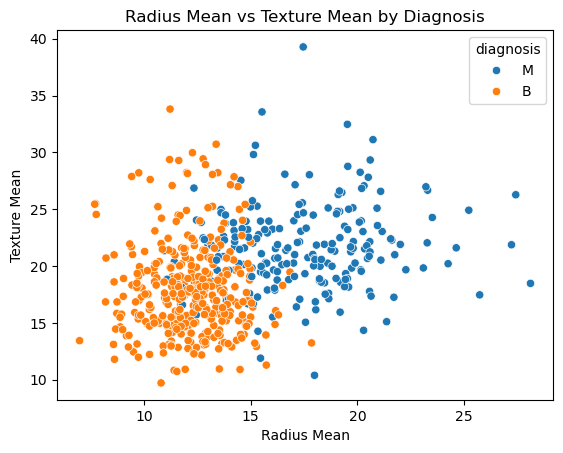

In [8]:
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=df)
plt.title('Radius Mean vs Texture Mean by Diagnosis')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.show()


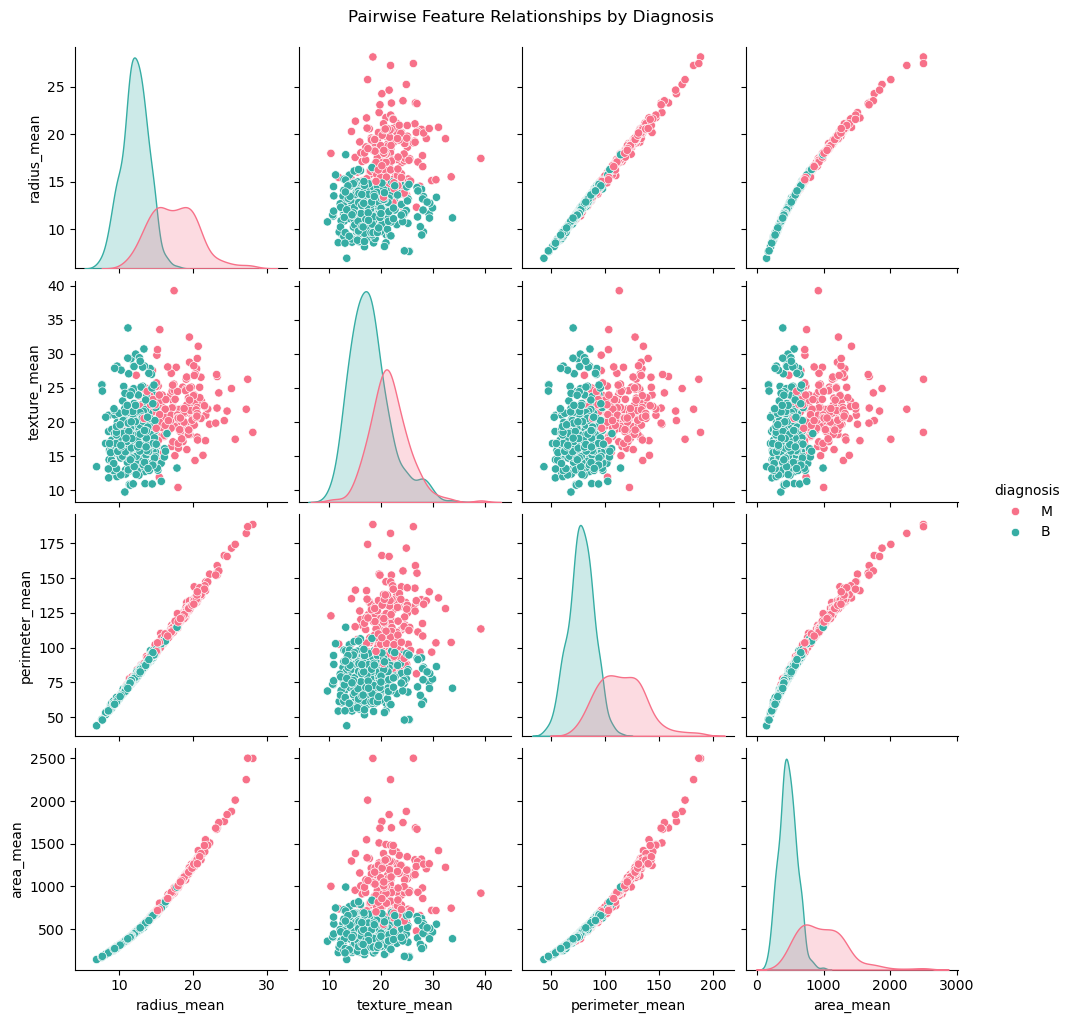

In [9]:
important_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']
sns.pairplot(df[important_features], hue='diagnosis', palette='husl')
plt.suptitle("Pairwise Feature Relationships by Diagnosis", y=1.02)
plt.show()


🔹 Accuracy: 0.9736842105263158

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



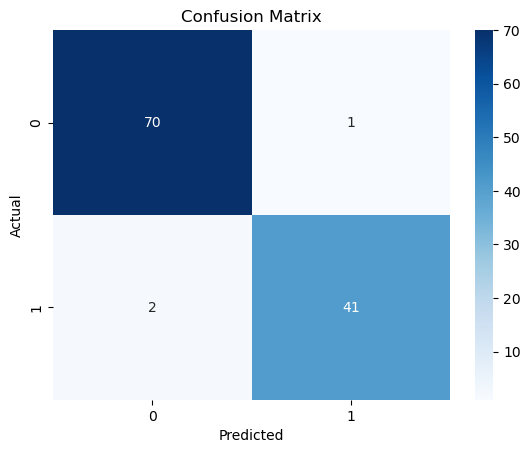

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


if 'id' in df.columns:
    df = df.drop(columns=['id'])
if 'Unnamed: 32' in df.columns:
    df = df.drop(columns=['Unnamed: 32'])

df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


🔹 Logistic Regression Accuracy: 0.9737
🔹 K-Nearest Neighbors Accuracy: 0.9474
🔹 Support Vector Machine Accuracy: 0.9825
🔹 Decision Tree Accuracy: 0.9386


c:\Users\USER\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\USER\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\USER\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(

🔹 Random Forest Accuracy: 0.9649


C:\Users\USER\AppData\Local\Temp\ipykernel_17512\2605785317.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.values()), y=list(results.keys()), palette="viridis")


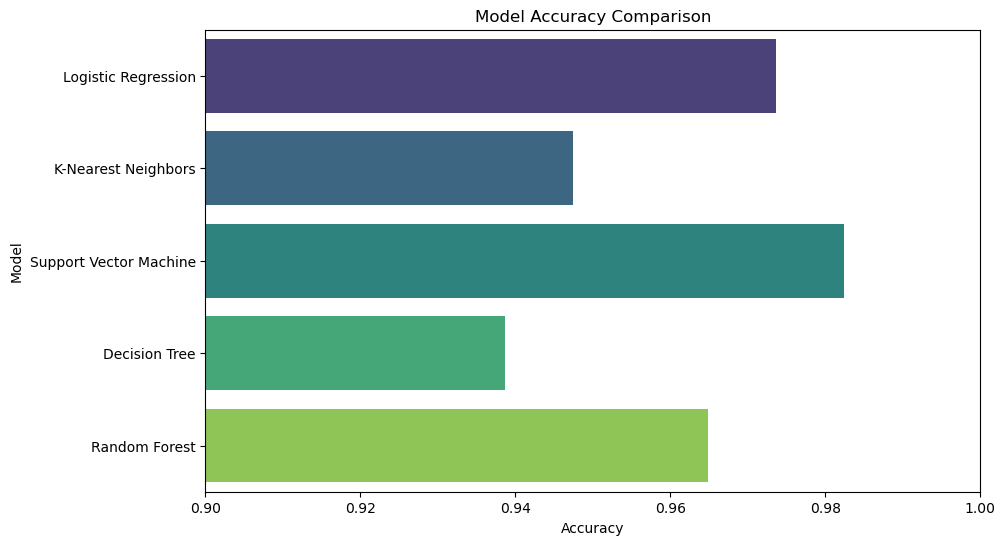

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"🔹 {name} Accuracy: {acc:.4f}")

plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.values()), y=list(results.keys()), palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.xlim(0.9, 1.0)
plt.show()



 Mode -> Logistic Regression
----------------------------------------
 Accuracy: 0.9737

 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



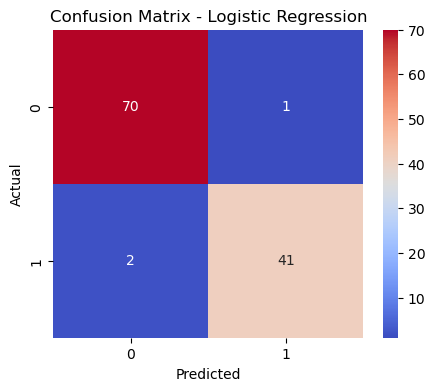


 Mode -> K-Nearest Neighbors
----------------------------------------
 Accuracy: 0.9474

 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



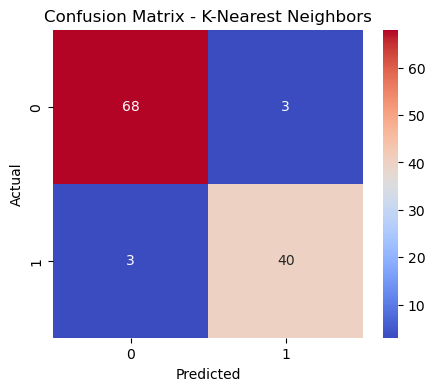


 Mode -> Support Vector Machine
----------------------------------------
 Accuracy: 0.9825

 Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



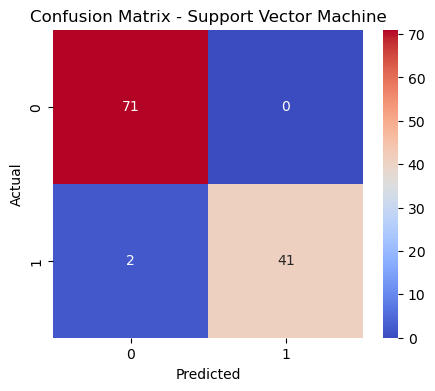


 Mode -> Decision Tree
----------------------------------------
 Accuracy: 0.9386

 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



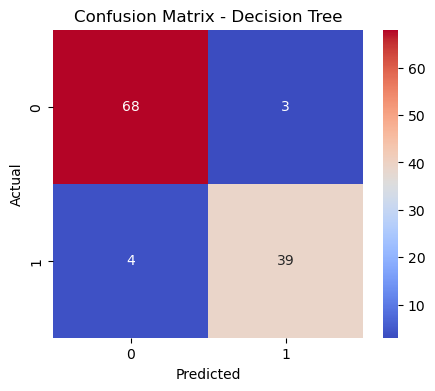


 Mode -> Random Forest
----------------------------------------
 Accuracy: 0.9649

 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



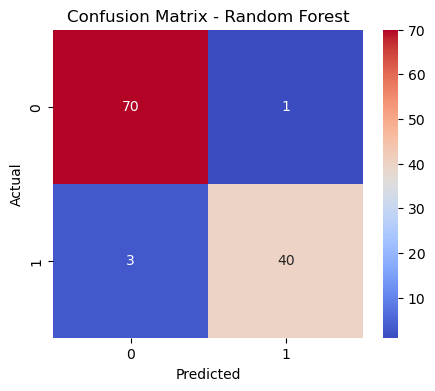

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

results = {}

for name, model in models.items():
    print(f"\n Mode -> {name}")
    print("-" * 40)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f" Accuracy: {acc:.4f}\n")
    
    print(" Classification Report:")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

